In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from scipy.cluster.hierarchy import cut_tree

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Amazon Sales data.csv to Amazon Sales data.csv


#Exploratory data analysis and data prepration and data cleaning.

In [ ]:
df=pd.read_csv('Amazon Sales data.csv')

In [ ]:
df.sample(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
82,Middle East and North Africa,Iran,Cosmetics,Online,H,11/15/2016,286959302,12-08-2016,6489,437.20,263.33,2836990.80,1708748.37,1128242.43
33,Asia,Myanmar,Household,Offline,H,1/16/2015,177713572,03-01-2015,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
35,Central America and the Caribbean,Costa Rica,Personal Care,Offline,L,05-08-2017,456767165,5/21/2017,6409,81.73,56.67,523807.57,363198.03,160609.54
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
29,Sub-Saharan Africa,The Gambia,Household,Offline,L,5/26/2012,886494815,06-09-2012,2370,668.27,502.54,1583799.90,1191019.80,392780.10
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,02-04-2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
45,Sub-Saharan Africa,Comoros,Cereal,Offline,H,3/29/2016,902102267,4/29/2016,962,205.70,117.11,197883.40,112659.82,85223.58
18,Asia,Turkmenistan,Household,Offline,L,12/30/2010,441619336,1/20/2011,3830,668.27,502.54,2559474.10,1924728.20,634745.90
60,Australia and Oceania,Australia,Cereal,Offline,H,06-09-2013,450563752,07-02-2013,682,205.70,117.11,140287.40,79869.02,60418.38
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [ ]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
df.shape

(100, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
df['Order ID']=df['Order ID'].astype(str)#customer id has not any significance as any numerical value so that converting it into string

In [ ]:
# Check unique date formats in the column
unique_formats = df['Order Date'].dropna().apply(lambda x: pd.to_datetime(x, errors='coerce').strftime('%m-%d-%Y')).unique()

# Define a function to convert dates to a common format
def standardize_date(date_str):
    if pd.isnull(date_str):
        return pd.NaT
    for format_str in unique_formats:
        try:
            return pd.to_datetime(date_str, errors='coerce').strftime('%m-%d-%Y')
        except ValueError:
            pass
    return pd.NaT

# Apply the function to standardize all dates
df['Order Date'] = df['Order Date'].apply(standardize_date)

# Now, you can convert the column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [ ]:
df.shape

(100, 14)

In [ ]:
# Apply the function to standardize all dates
df['Ship Date'] = df['Ship Date'].apply(standardize_date)
# Now, you can convert the column to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    object        
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memor

##Finding total time taken to deliver the product.

In [ ]:
df['Delivery time']=df['Ship Date']-df['Order Date']

In [ ]:
df = df.set_index('Order Date')

In [ ]:
df=df.drop('Ship Date',axis=1)

##Get to know In which region What type of product is profitable.

In [ ]:
df_group_region=df.groupby(['Region','Item Type'])['Total Profit'].sum().reset_index()

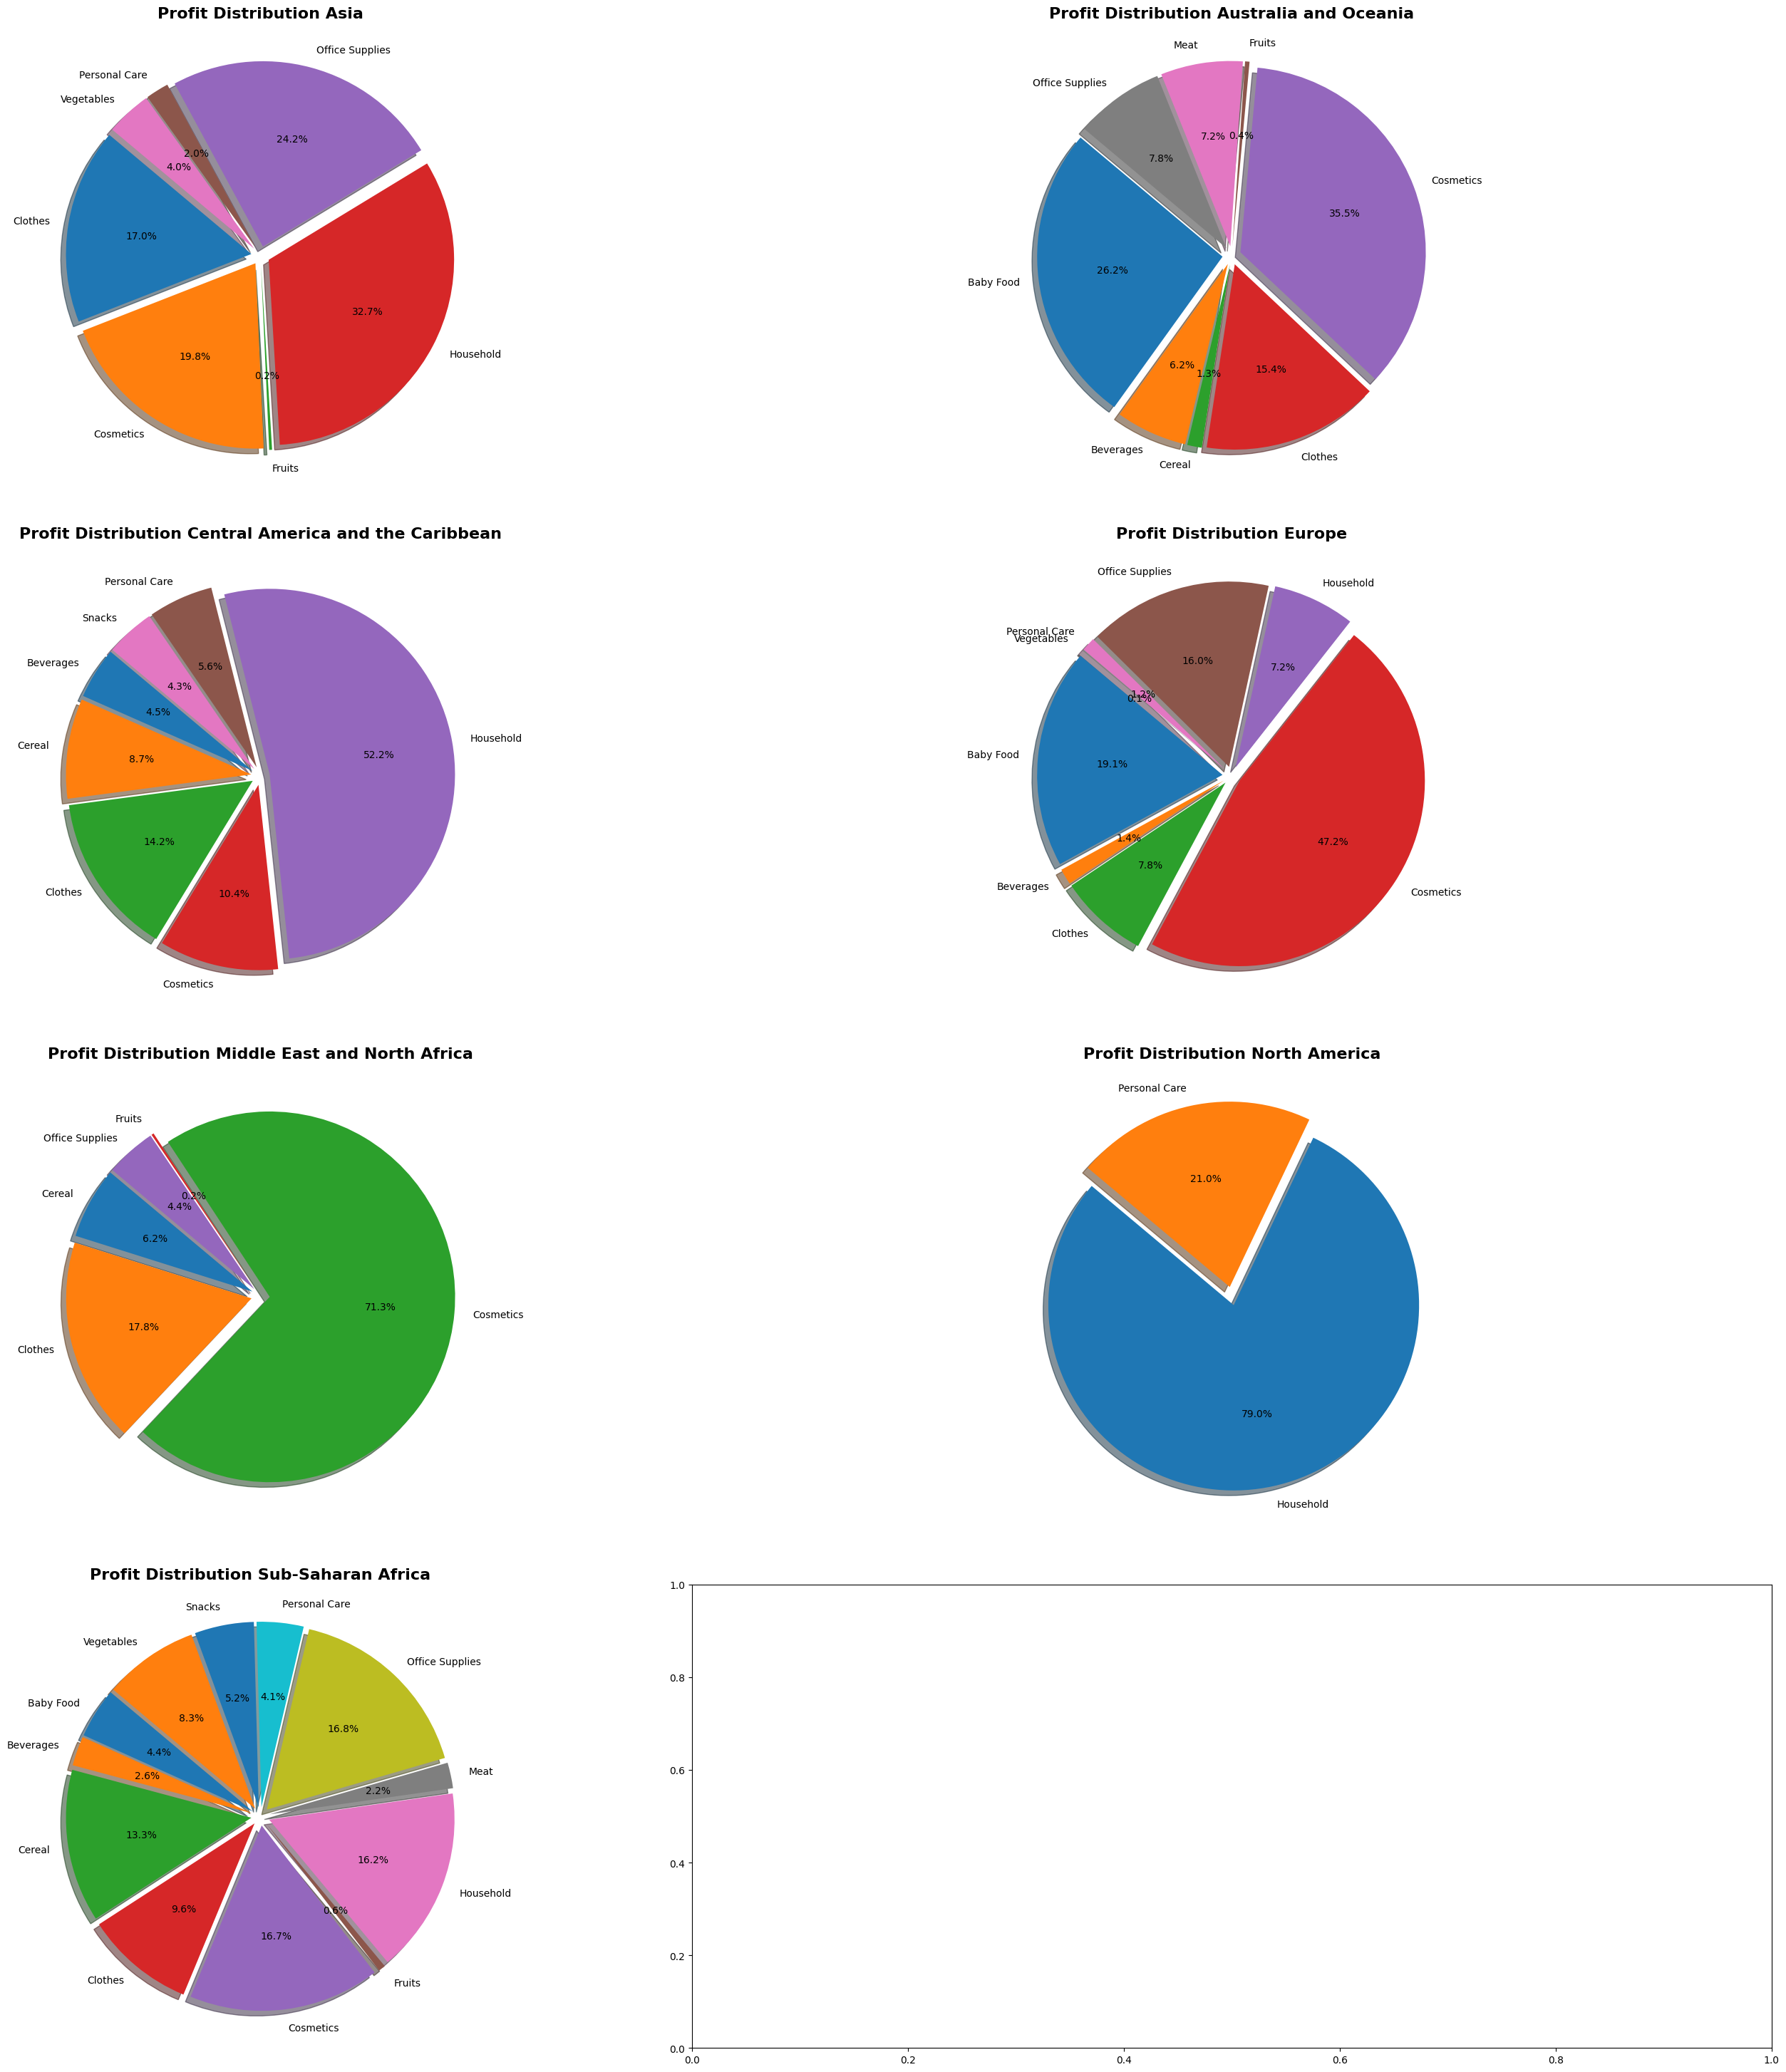

In [ ]:
# Group the DataFrame by 'Region'
grouped = df_group_region.groupby('Region')

# Calculate the number of rows and columns needed for subplots
num_regions = len(grouped)
num_cols = 2
num_rows = (num_regions + num_cols - 1) // num_cols

# Create subplots with larger figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Flatten the axes array if it's not already 1-dimensional
if num_rows == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Iterate over each group (region) and plot pie chart
for i, (region, data) in enumerate(grouped):
    item_types = data['Item Type']
    profits = data['Total Profit']

    # Create a pie chart for the current region
    explode = [0.05] * len(item_types)  # To highlight slices
    axes[i].pie(profits, labels=item_types, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
    axes[i].set_title(f'Profit Distribution {region}', fontsize=16, fontweight='bold')
    axes[i].set_aspect('equal')  # Set aspect ratio to 'equal' to make pie circular

# Adjust layout
plt.tight_layout(pad=4)
plt.show()

##Top 3 Most profitable Item type in Every Region.

In [ ]:
df_group_country=df.groupby(['Country','Item Type'])['Total Profit'].sum().reset_index()

In [ ]:
df_group_item=df.groupby('Item Type')['Total Profit'].sum().reset_index()

<ipython-input-20-b51afcd72f47>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


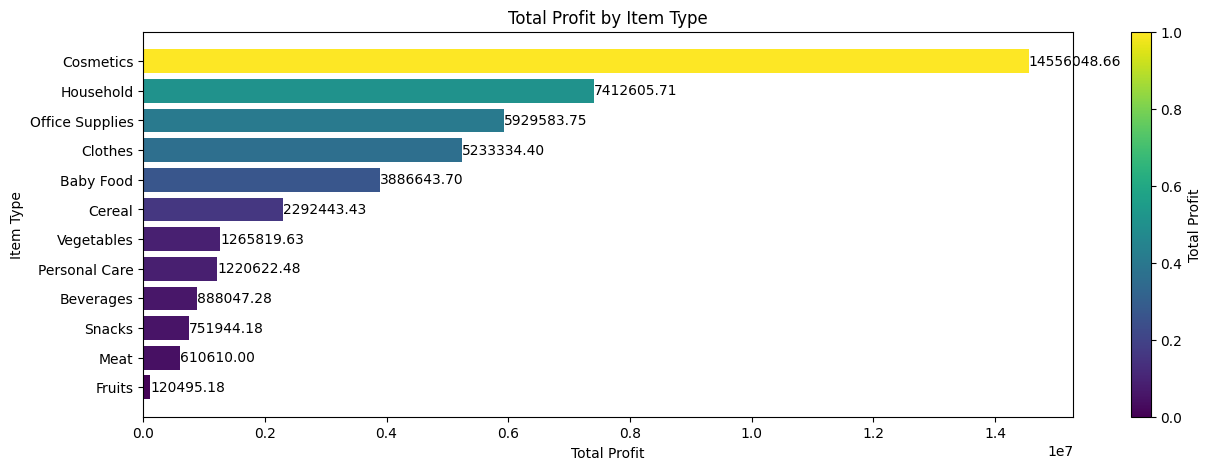

In [ ]:
# Sort the DataFrame by 'Total Profit' in descending order
df_sorted = df_group_item.sort_values(by='Total Profit', ascending=False)

# Plotting with colormap
plt.figure(figsize=(15,5))
bars = plt.barh(df_sorted['Item Type'], df_sorted['Total Profit'], color=plt.cm.viridis(df_sorted['Total Profit'] / max(df_sorted['Total Profit'])))
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.title('Total Profit by Item Type')

# Add color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cbar.set_label('Total Profit')

# Add values to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, '{:.2f}'.format(width), ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display items with the highest profit at the top
plt.show()

In [ ]:
df_group_item_trends=df.groupby(['Item Type','Order Date','Region'])['Total Profit'].sum().reset_index()

In [ ]:
df_group_item_trends.set_index('Order Date')

,Item Type,Region,Total Profit
Order Date,,,
2010-05-28,Baby Food,Australia and Oceania,951410.50
2012-05-29,Baby Food,Europe,825738.04
2013-06-26,Baby Food,Europe,455335.00
2014-02-03,Baby Food,Sub-Saharan Africa,532885.74
2014-05-14,Baby Food,Europe,714157.00
...,...,...,...
2011-09-15,Vegetables,Asia,235601.16
2012-03-18,Vegetables,Sub-Saharan Africa,407630.41
2012-07-17,Vegetables,Sub-Saharan Africa,510216.66


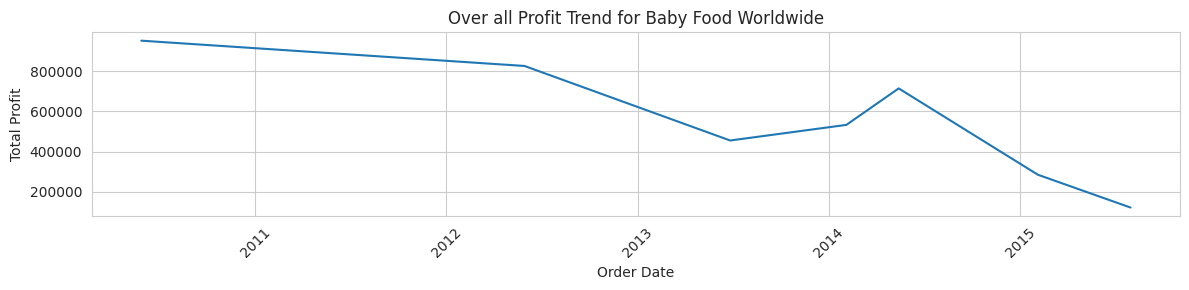

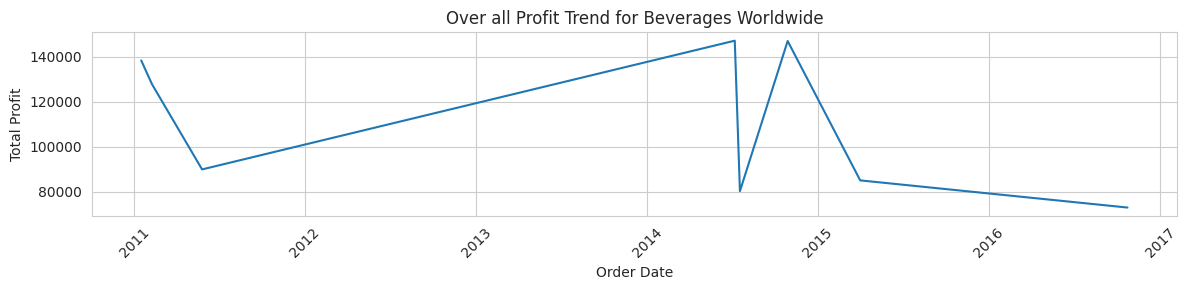

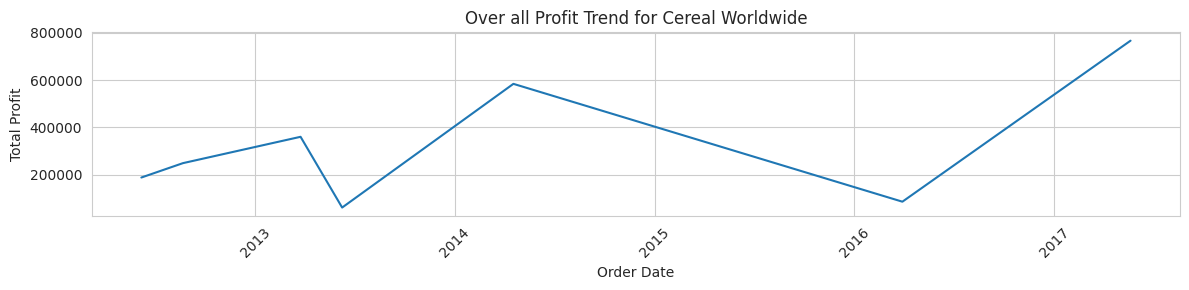

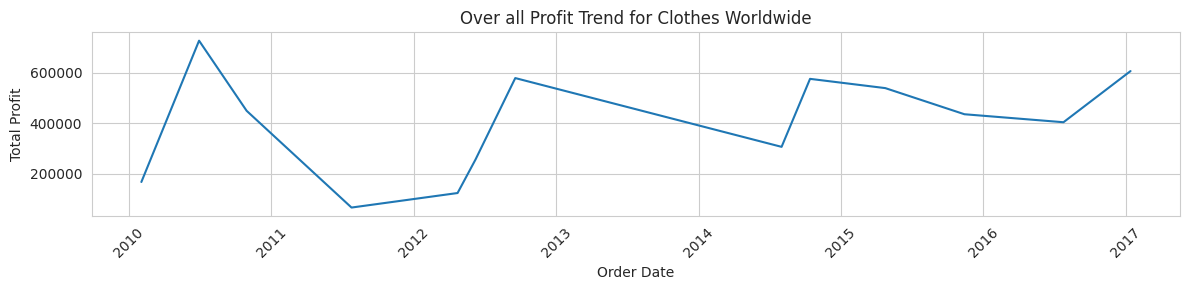

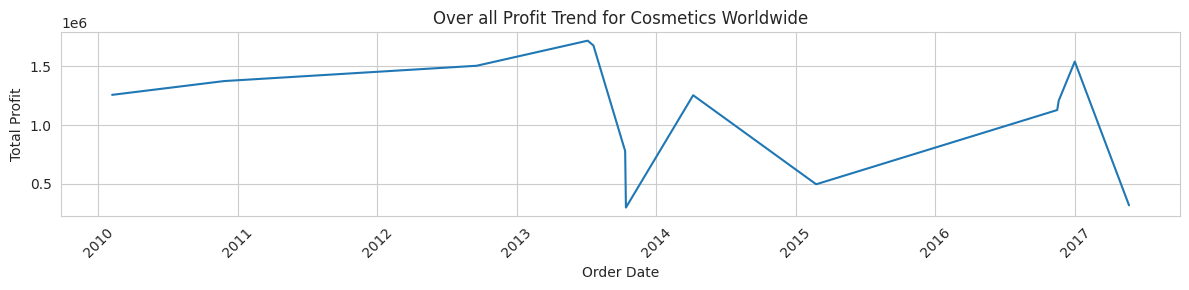

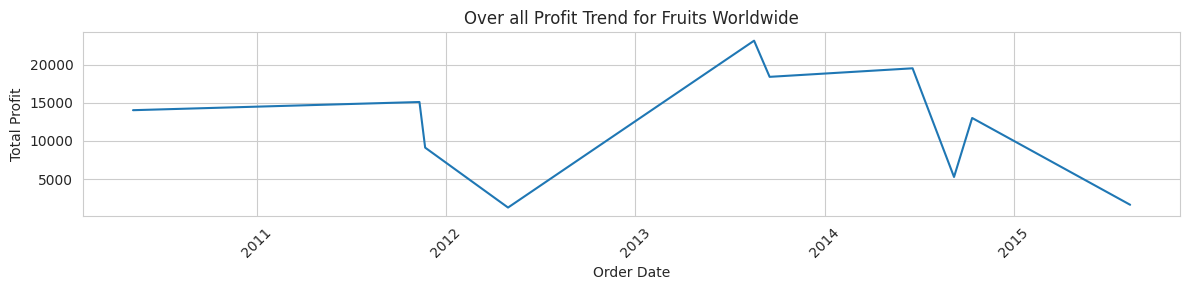

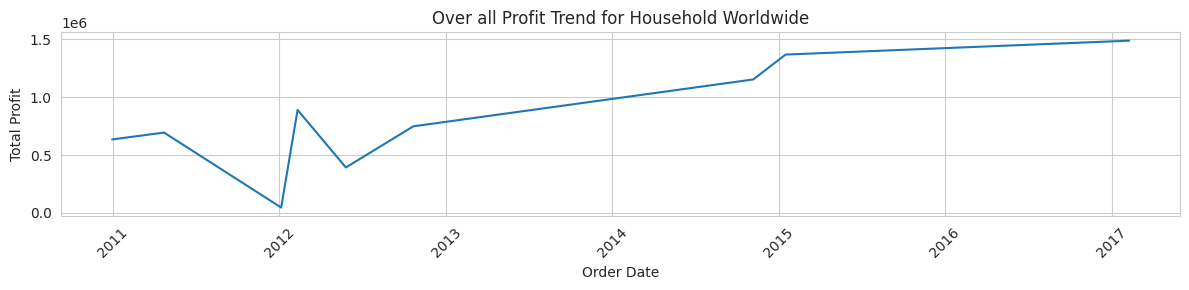

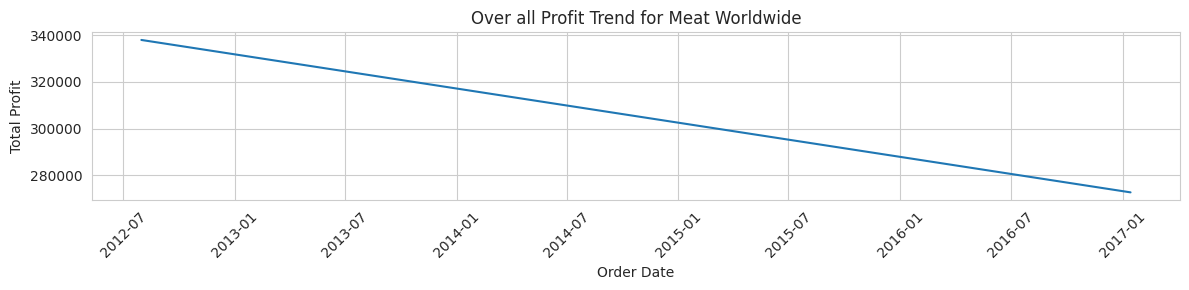

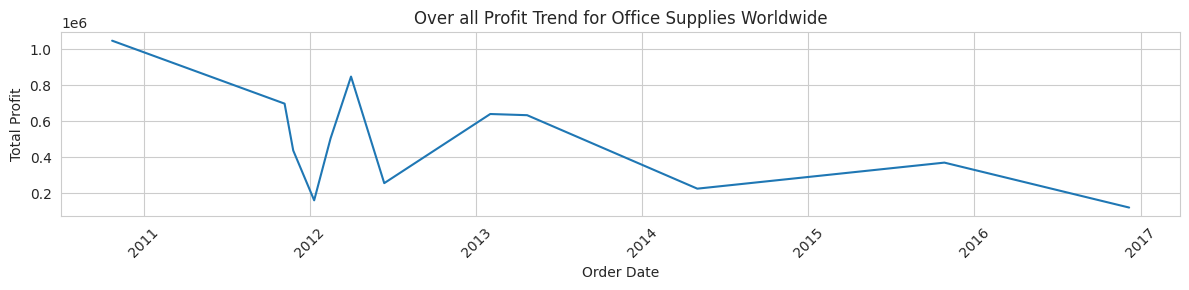

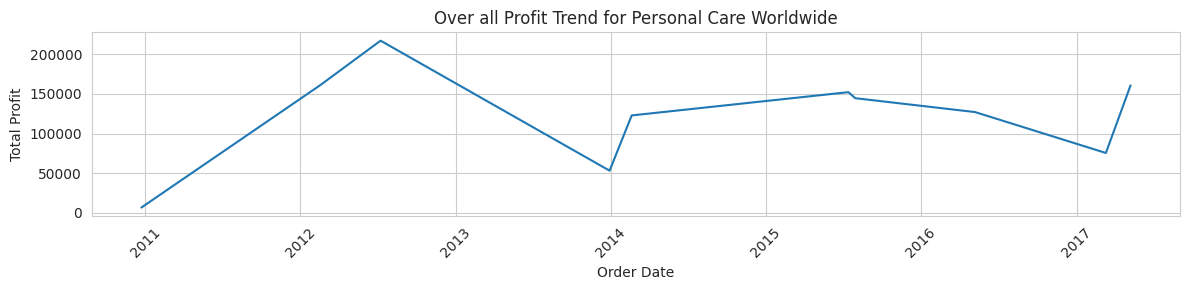

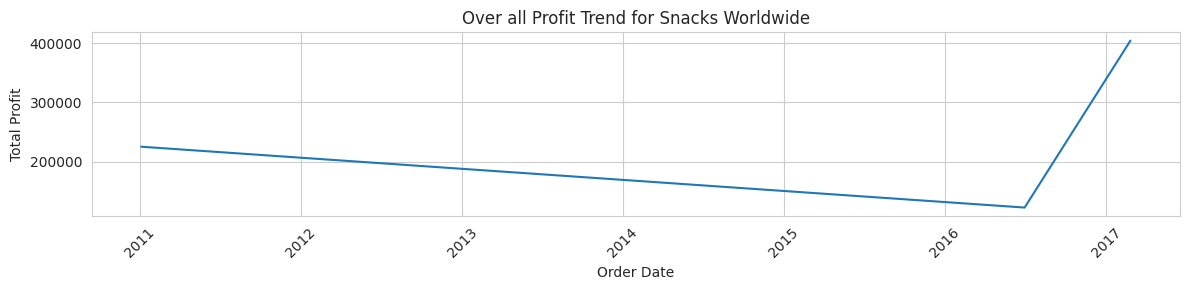

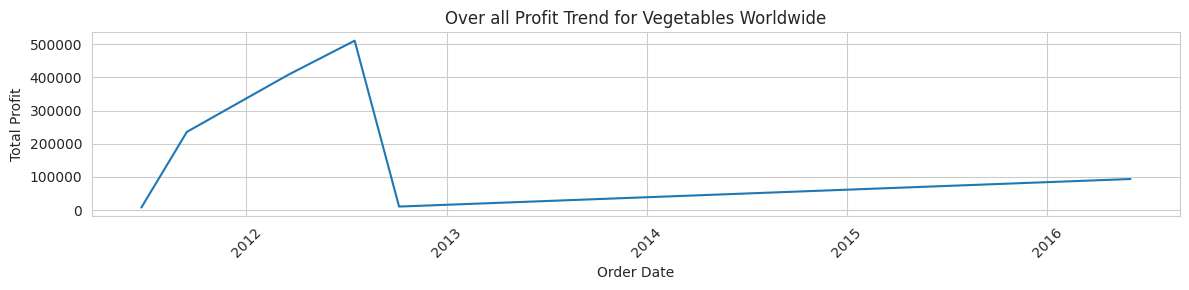

In [ ]:
for item_type in df_group_item_trends['Item Type'].unique():
    # Filter data for the current item type
    item_data = df_group_item_trends[df_group_item_trends['Item Type'] == item_type]

    # Plotting
    plt.figure(figsize=(12,3))
    sns.set_style("whitegrid")

    # Plotting line chart for the current item type
    sns.lineplot(x='Order Date', y='Total Profit', data=item_data)

    # Set labels and title
    plt.xlabel('Order Date')
    plt.ylabel('Total Profit')
    plt.title(f'Over all Profit Trend for {item_type} Worldwide')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show plot
    plt.tight_layout()
    plt.show()

#Getting the Overall profit margin of each item.

In [ ]:
df_group_item_revenue=df.groupby('Item Type')['Total Revenue'].sum().reset_index()

In [ ]:
df_group_item_revenue

,Item Type,Total Revenue
0,Baby Food,10350327.60
1,Beverages,2690794.60
2,Cereal,5322898.90
3,Clothes,7787292.80
4,Cosmetics,36601509.60
5,Fruits,466481.34
6,Household,29889712.29
7,Meat,4503675.75
8,Office Supplies,30585380.07
9,Personal Care,3980904.84


In [ ]:
df_profit_margin=pd.merge(df_group_item_revenue,df_group_item, how='inner', on='Item Type')

In [ ]:
df_profit_margin

,Item Type,Total Revenue,Total Profit
0,Baby Food,10350327.60,3886643.70
1,Beverages,2690794.60,888047.28
2,Cereal,5322898.90,2292443.43
3,Clothes,7787292.80,5233334.40
4,Cosmetics,36601509.60,14556048.66
5,Fruits,466481.34,120495.18
6,Household,29889712.29,7412605.71
7,Meat,4503675.75,610610.00
8,Office Supplies,30585380.07,5929583.75
9,Personal Care,3980904.84,1220622.48


In [ ]:
df_profit_margin['Margin']=(df_profit_margin['Total Profit']/df_profit_margin['Total Revenue'])*100

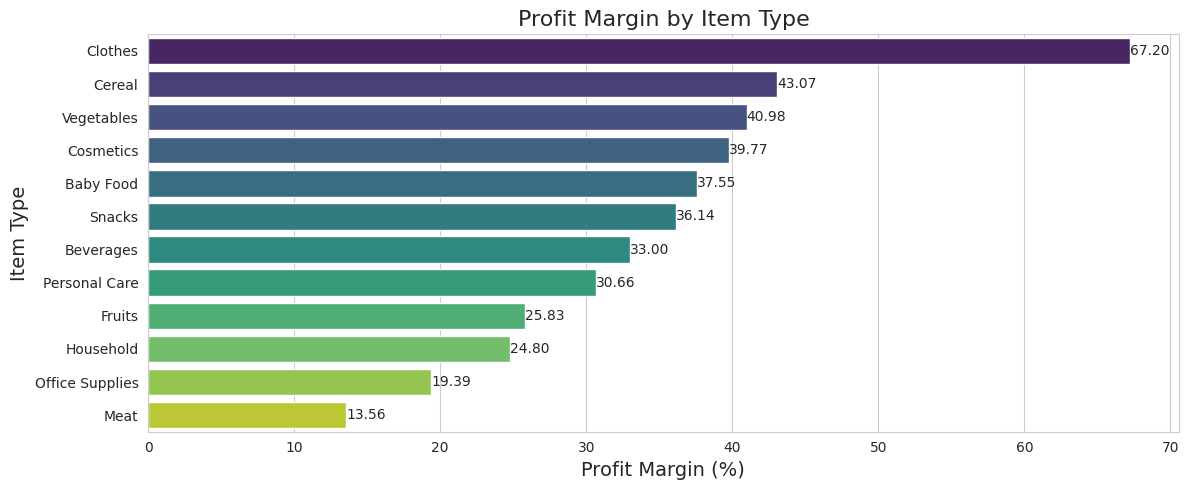

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_profit_margin contains 'Item Type', 'Total Profit', 'Total Revenue', and 'Margin'

# Calculate profit margin
df_profit_margin['Margin'] = (df_profit_margin['Total Profit'] / df_profit_margin['Total Revenue']) * 100

# Sort DataFrame by profit margin
df_sorted = df_profit_margin.sort_values(by='Margin', ascending=False)

# Plotting
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(x='Margin', y='Item Type', data=df_sorted, hue='Item Type', palette='viridis', legend=False)

# Set labels and title
plt.xlabel('Profit Margin (%)', fontsize=14)
plt.ylabel('Item Type', fontsize=14)
plt.title('Profit Margin by Item Type', fontsize=16)

# Annotate bars with profit margin values
for index, value in enumerate(df_sorted['Margin']):
    bar_plot.text(value, index, f'{value:.2f}', va='center')

# Show plot
plt.tight_layout()
plt.show()


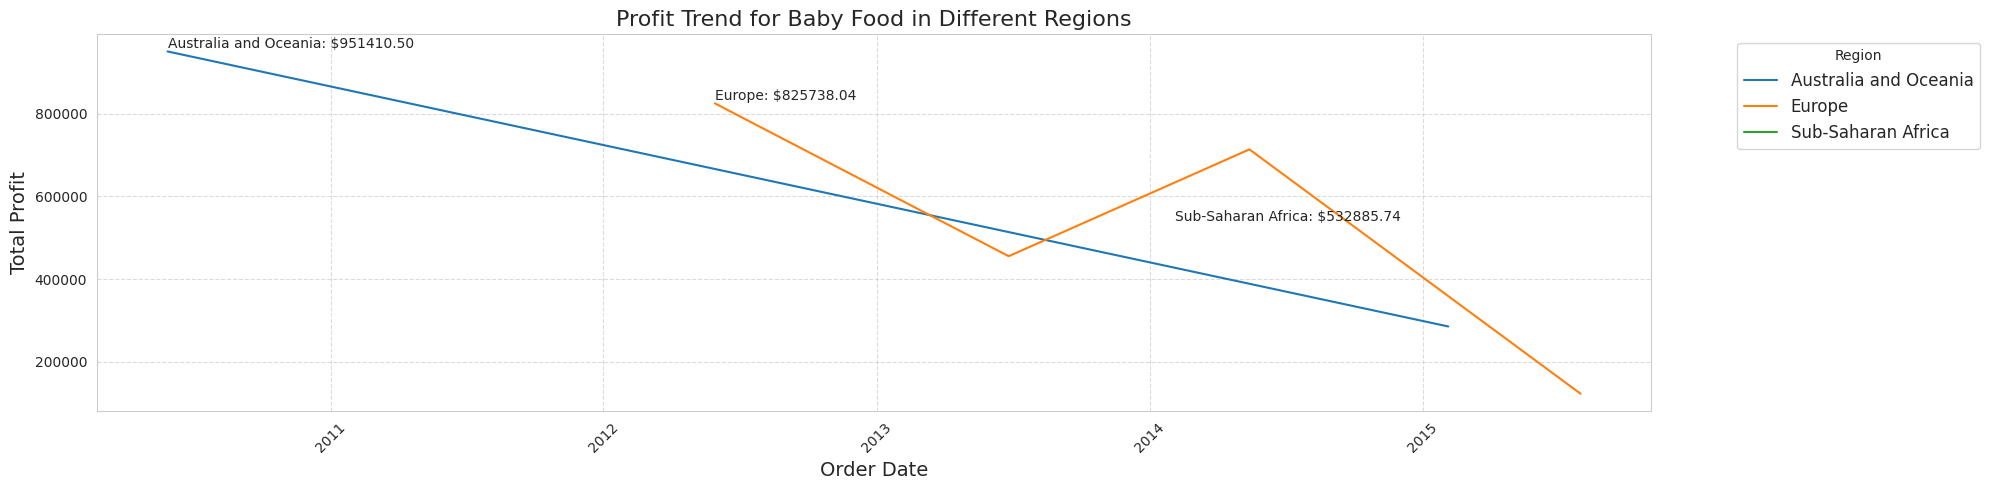

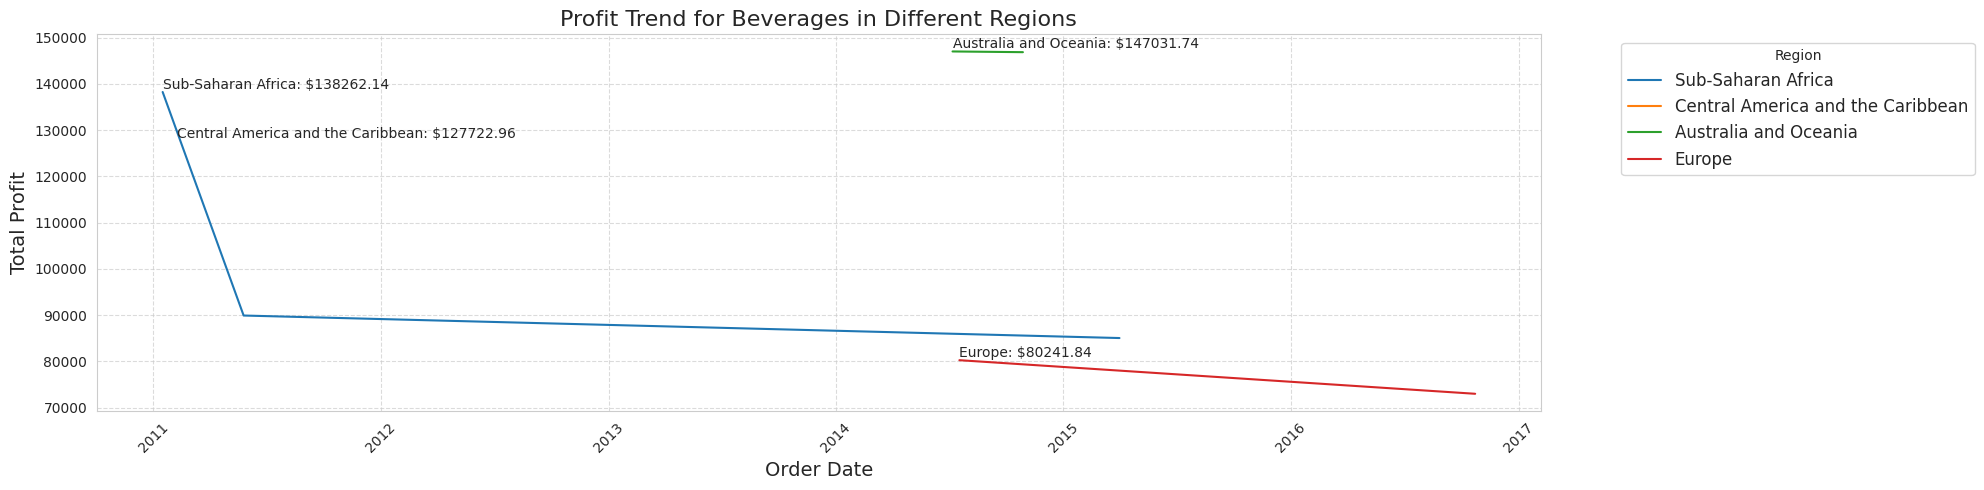

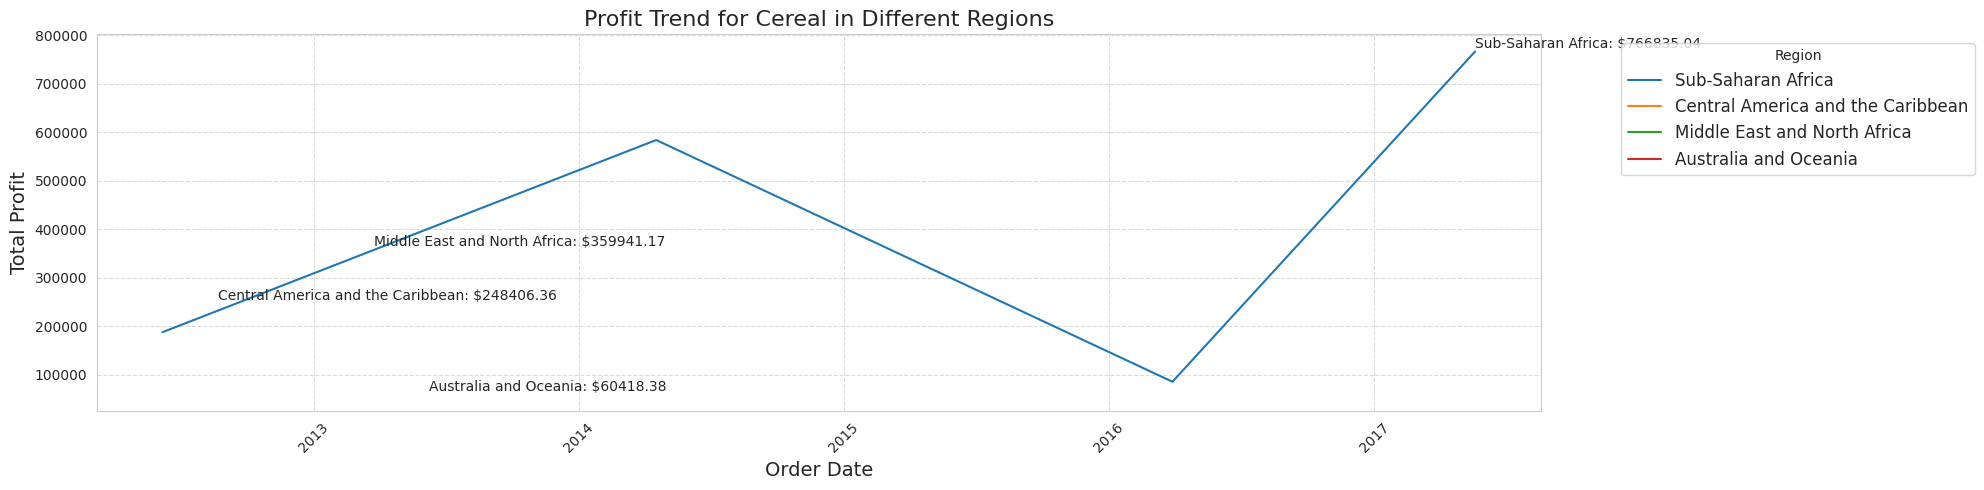

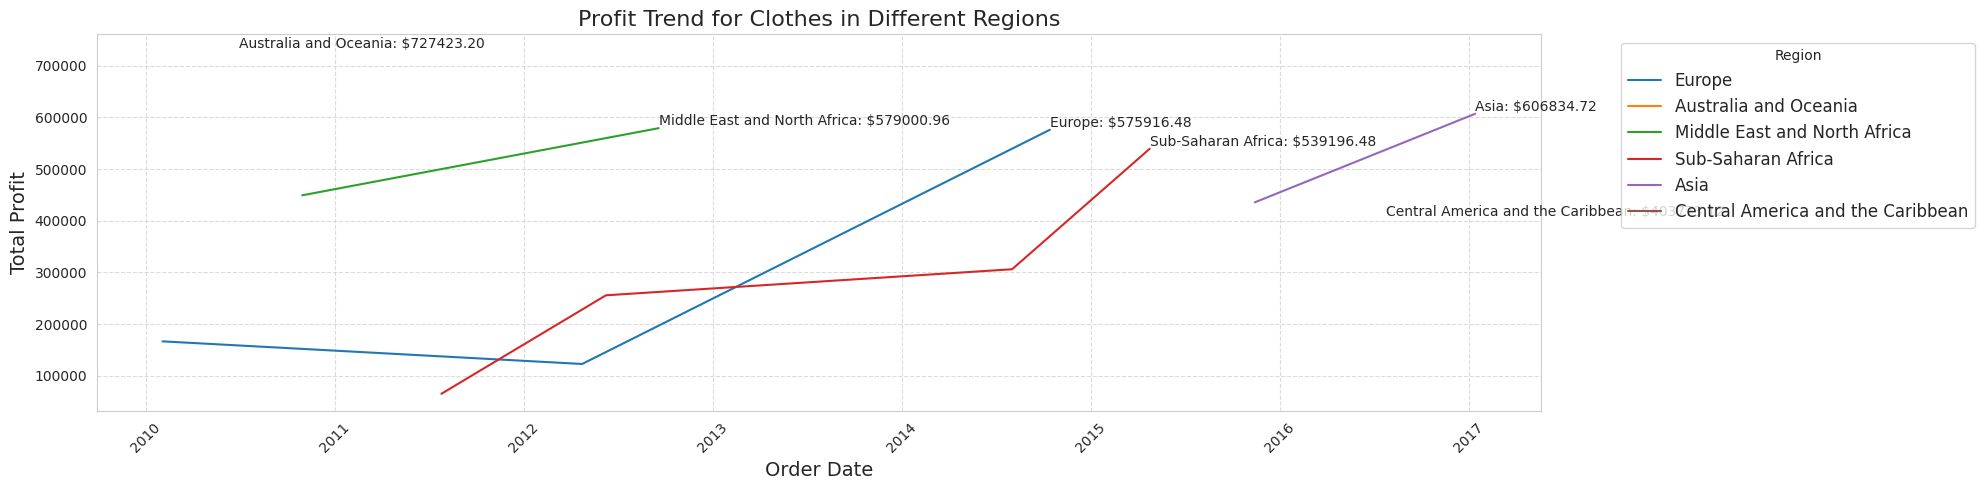

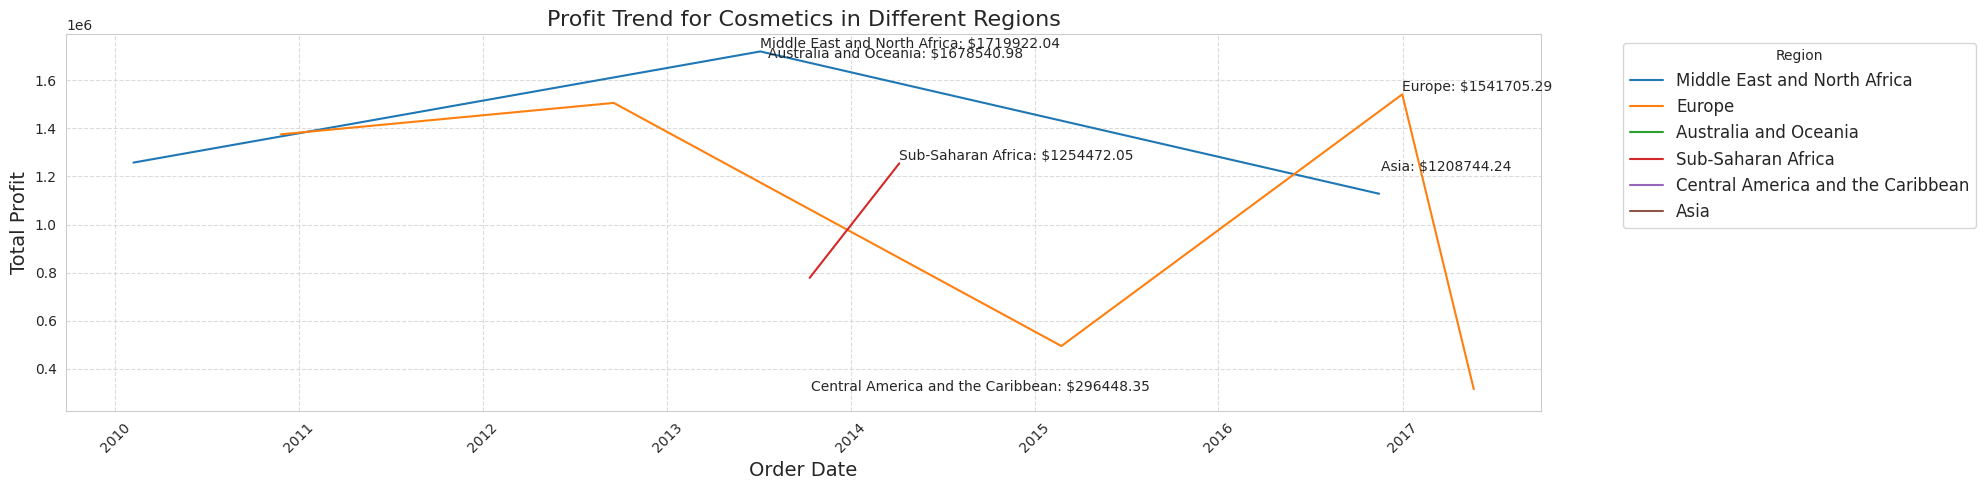

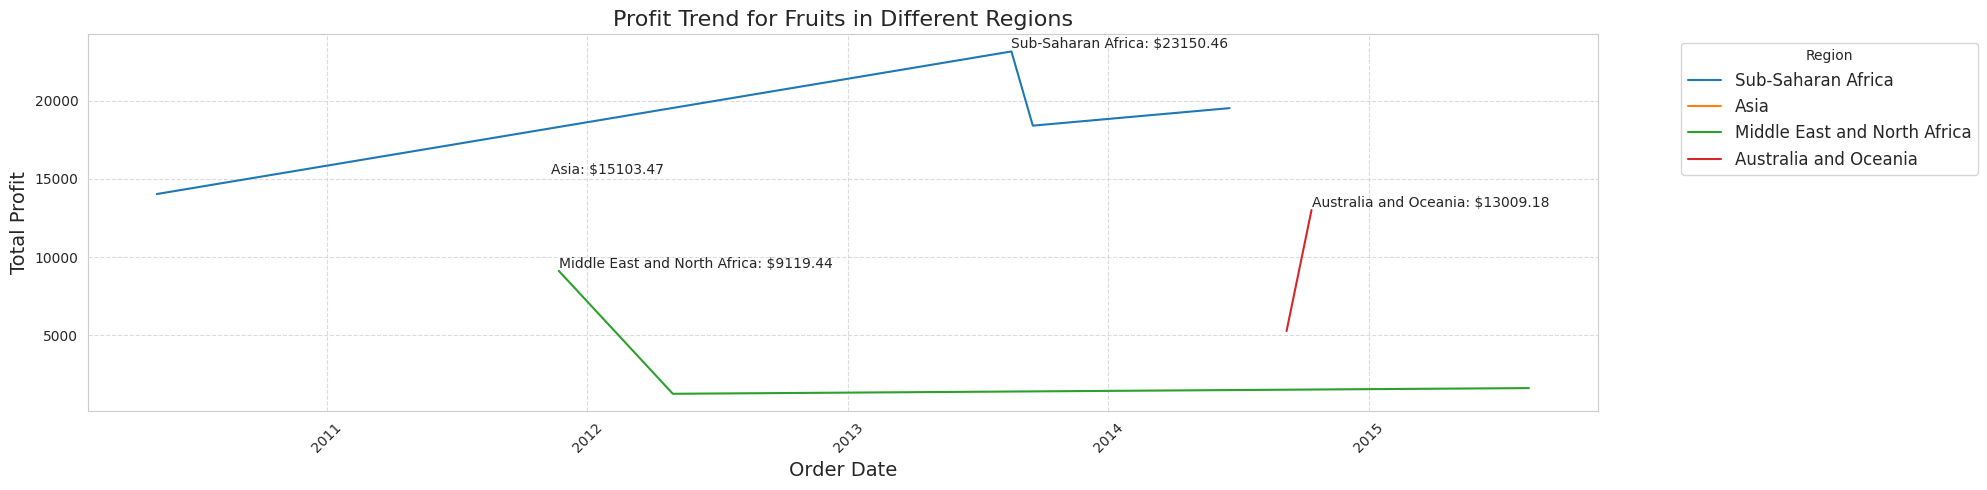

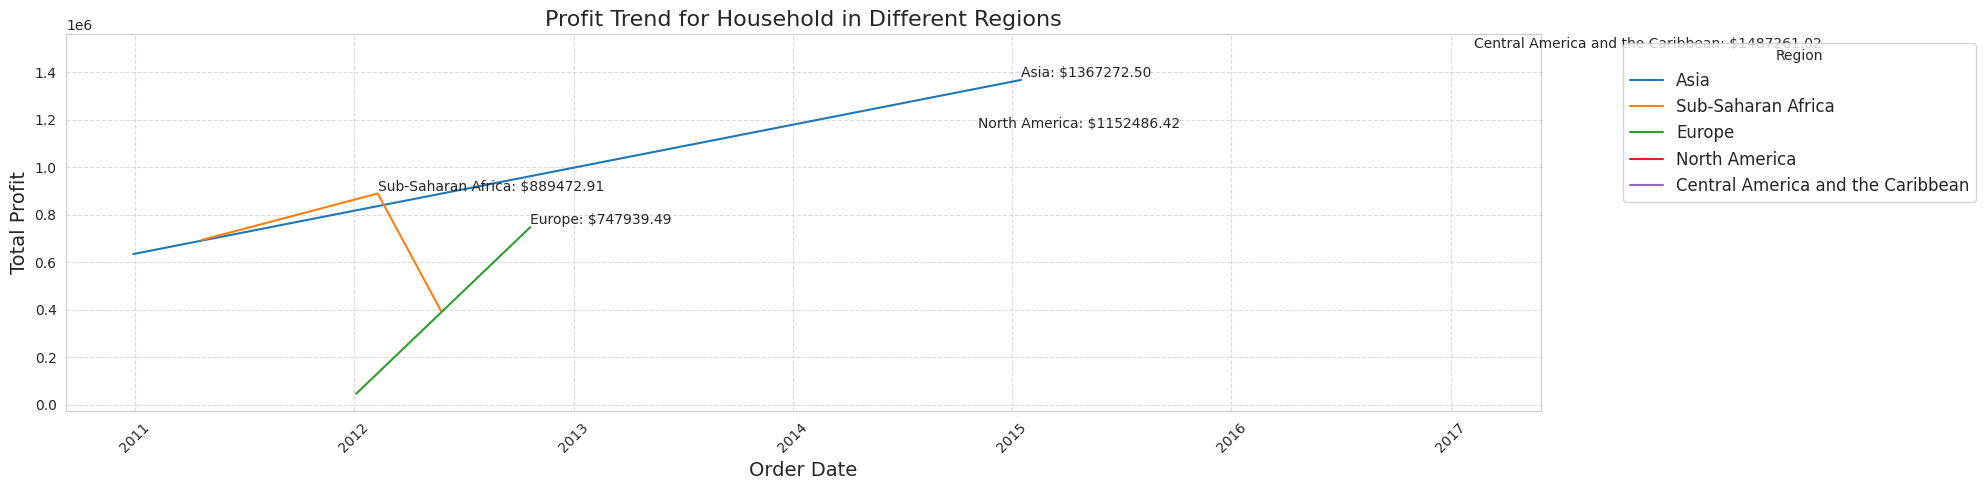

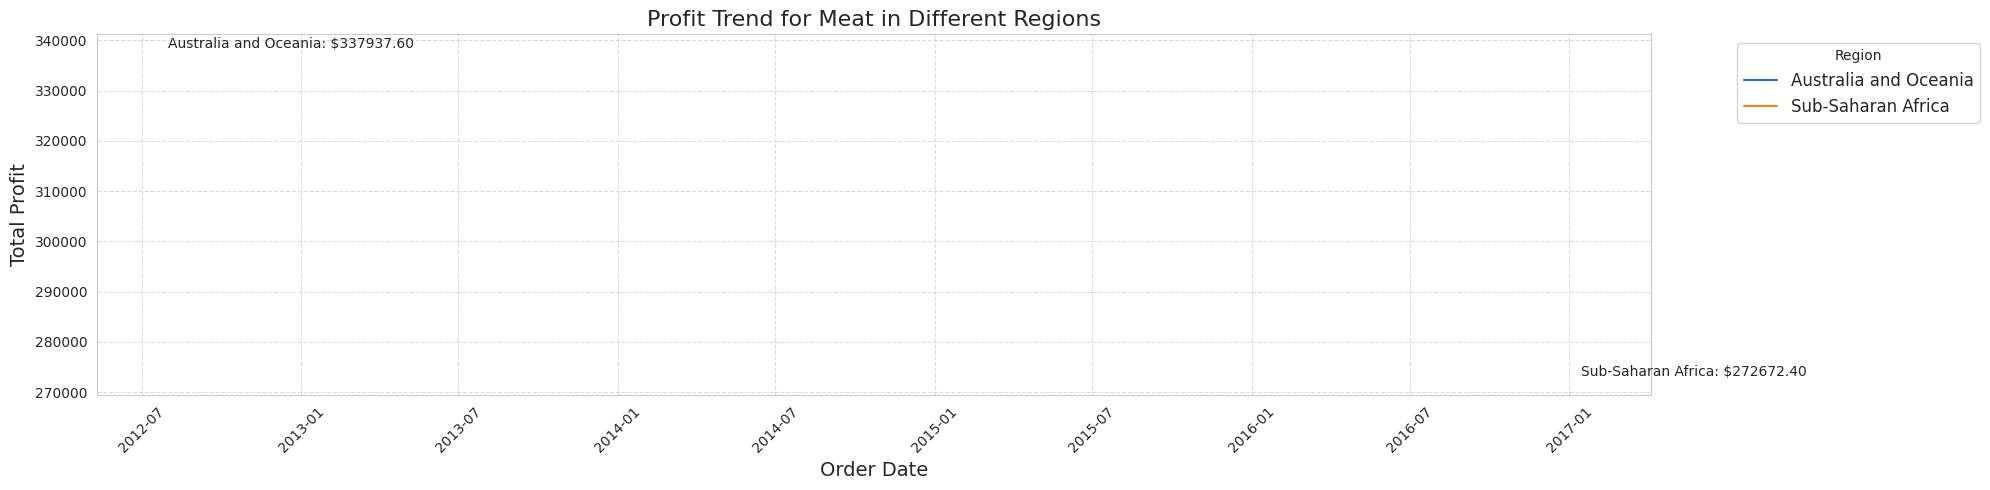

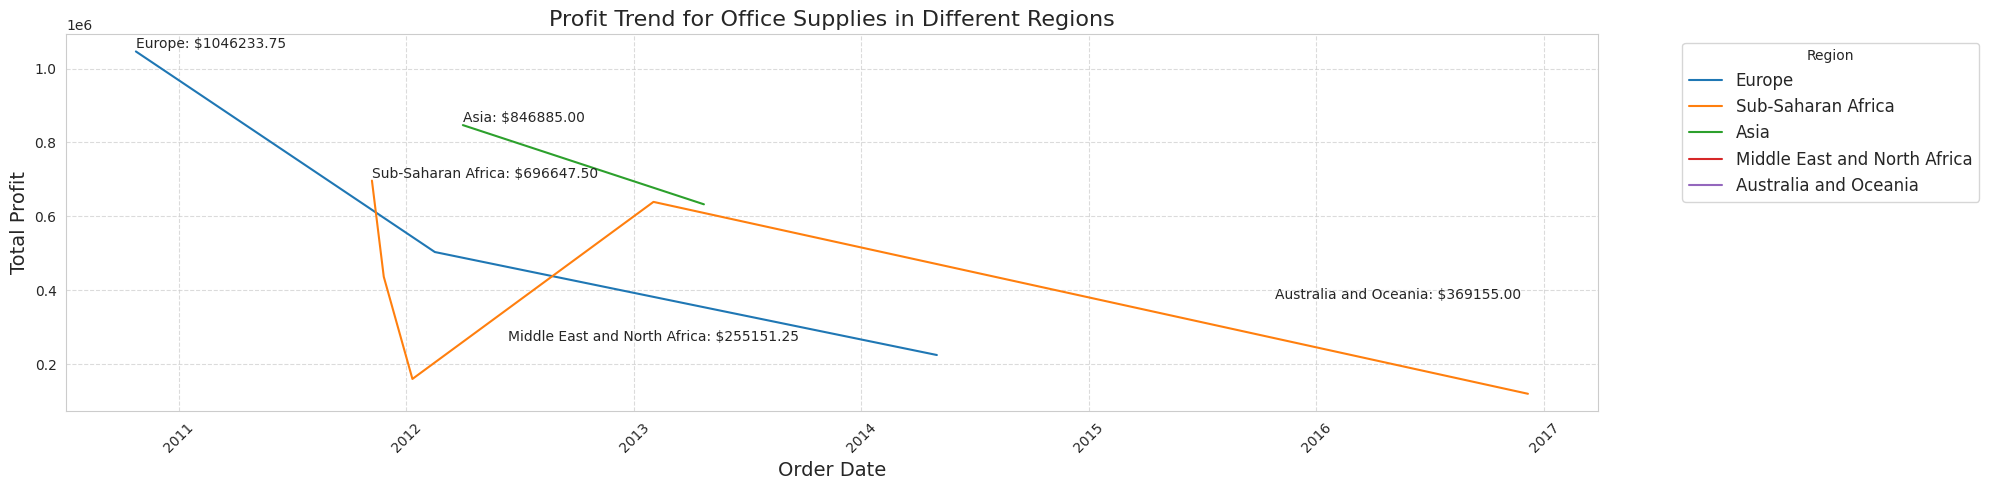

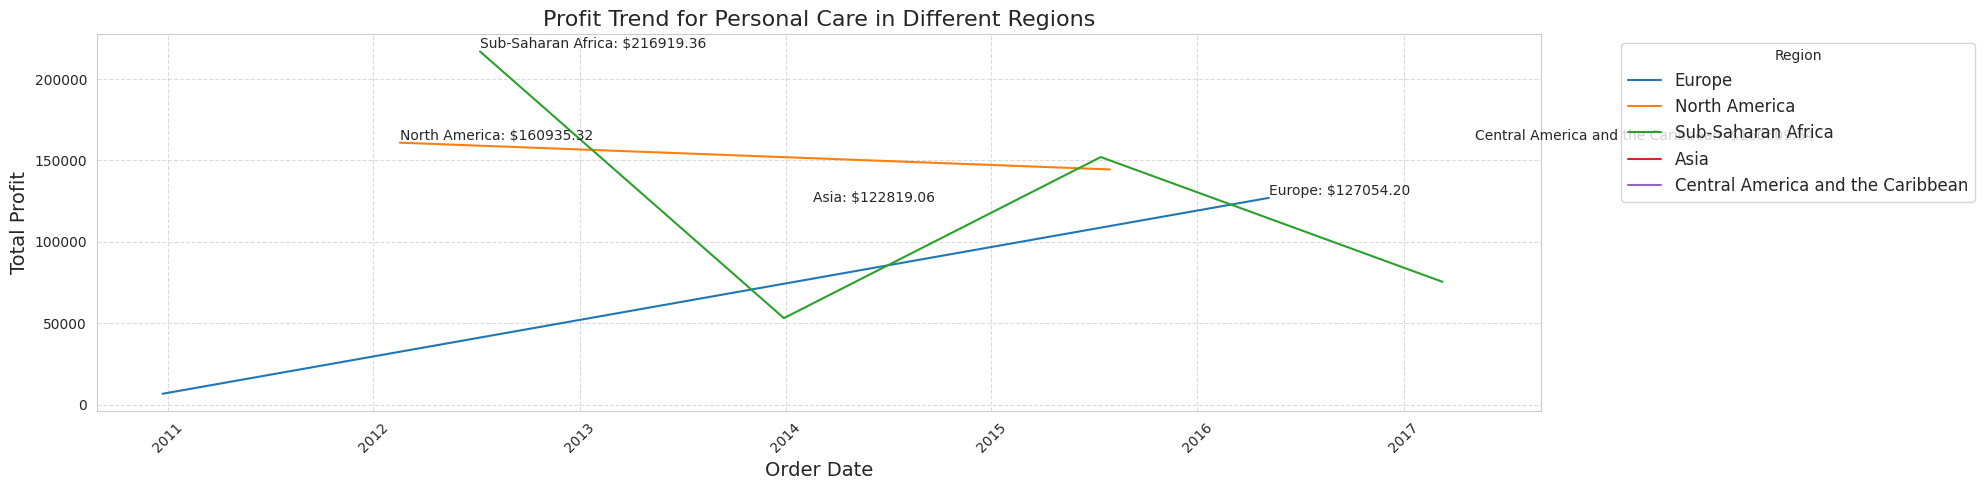

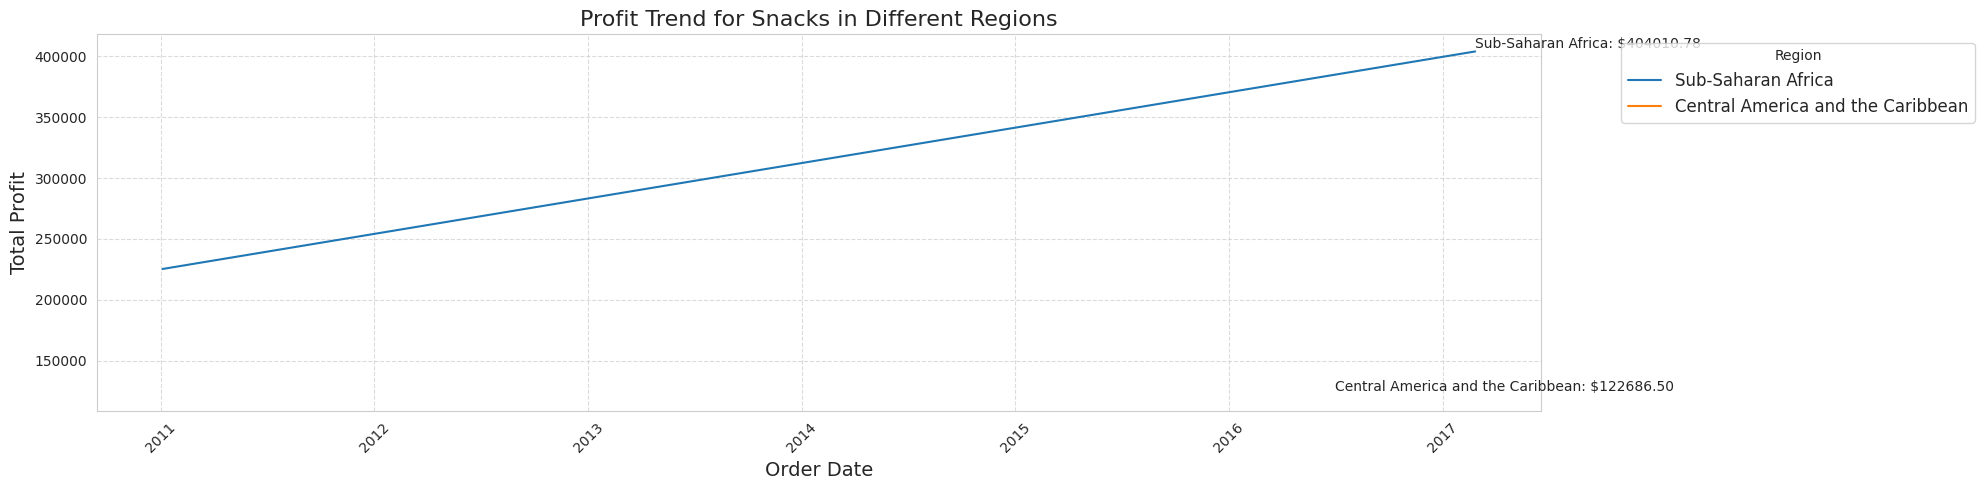

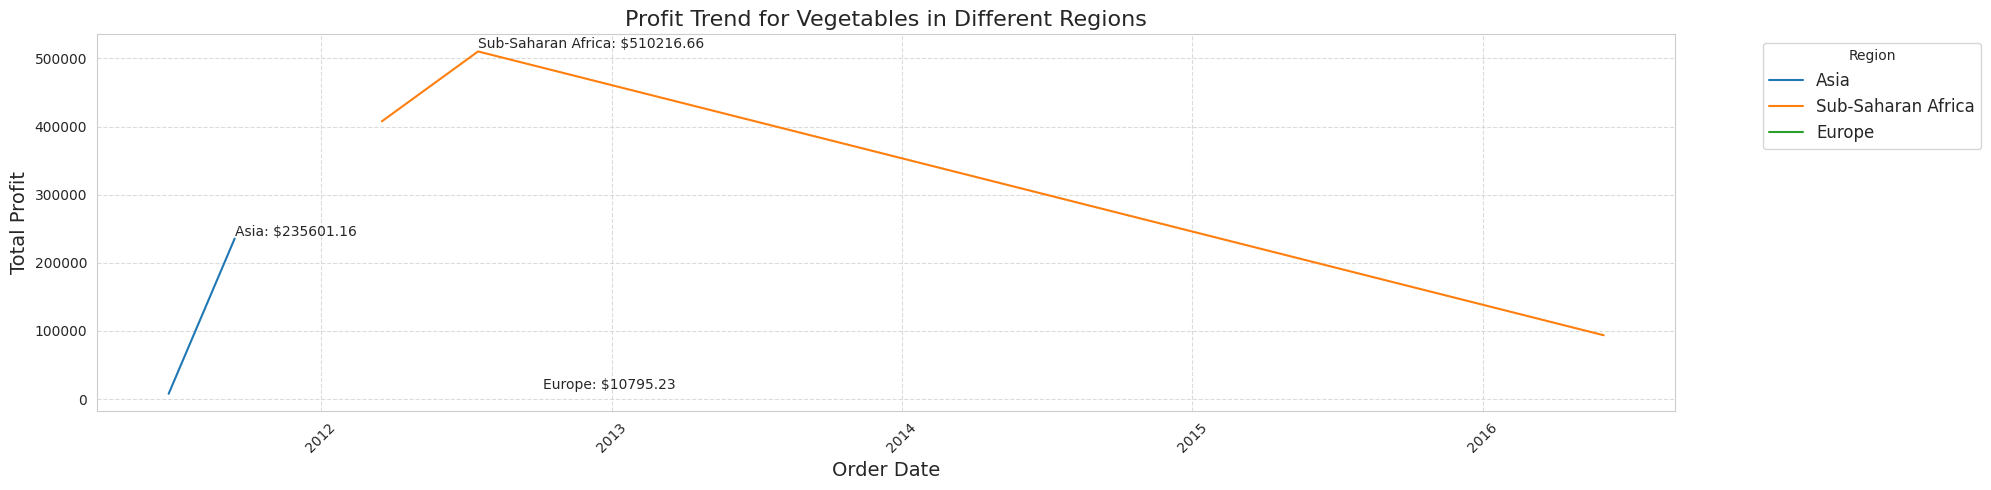

In [ ]:
# Plotting individual graphs for each item type
for item_type in df_group_item_trends['Item Type'].unique():
    # Filter data for the current item type
    item_data = df_group_item_trends[df_group_item_trends['Item Type'] == item_type]

    # Get unique regions for the current item type
    regions = item_data['Region'].unique()

    # Plotting
    plt.figure(figsize=(20, 5))
    sns.set_style("whitegrid")

    # Use a colormap for better visualization
    colormap = plt.cm.tab10.colors

    # Iterate over each region and plot profit trends
    for i, region in enumerate(regions):
        # Filter data for the current region
        region_data = item_data[item_data['Region'] == region]

        # Plotting line chart for the current region
        sns.lineplot(x='Order Date', y='Total Profit', data=region_data, label=region, color=colormap[i])

        # Annotate the highest point for each region
        max_profit_index = region_data['Total Profit'].idxmax()
        max_profit = region_data.loc[max_profit_index, 'Total Profit']
        max_date = region_data.loc[max_profit_index, 'Order Date']
        plt.text(max_date, max_profit, f'{region}: ${max_profit:.2f}', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

    # Set labels and title
    plt.xlabel('Order Date', fontsize=14)
    plt.ylabel('Total Profit', fontsize=14)
    plt.title(f'Profit Trend for {item_type} in Different Regions', fontsize=16)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

#Get to know in which country which item sold the most.

In [ ]:
df_country_per_region=df.groupby('Region')['Country'].size()

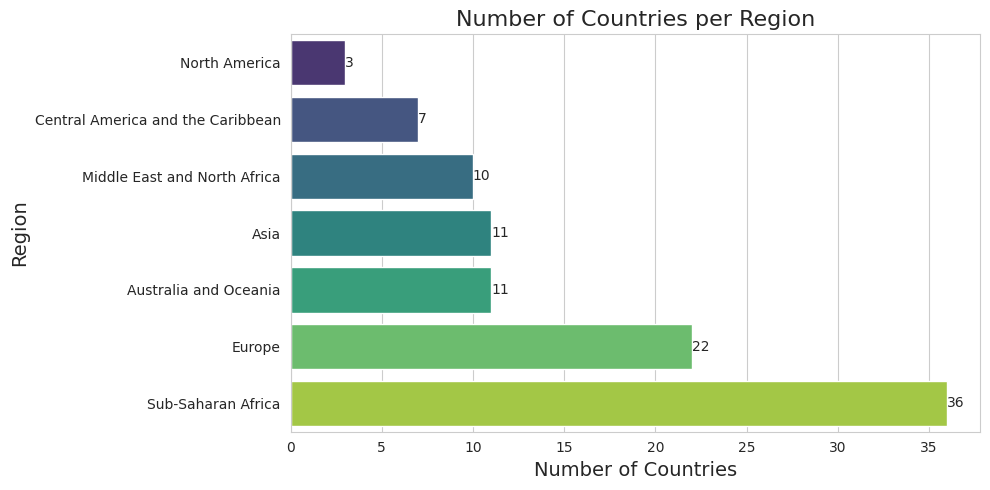

In [ ]:
# Sort the DataFrame by the number of countries per region
df_country_per_region_sorted = df_country_per_region.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10,5))
bars = sns.barplot(x=df_country_per_region_sorted.values, y=df_country_per_region_sorted.index, hue=df_country_per_region_sorted.index, palette='viridis', legend=False)

# Annotate bars with values
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10)

# Set labels and title
plt.xlabel('Number of Countries', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.title('Number of Countries per Region', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

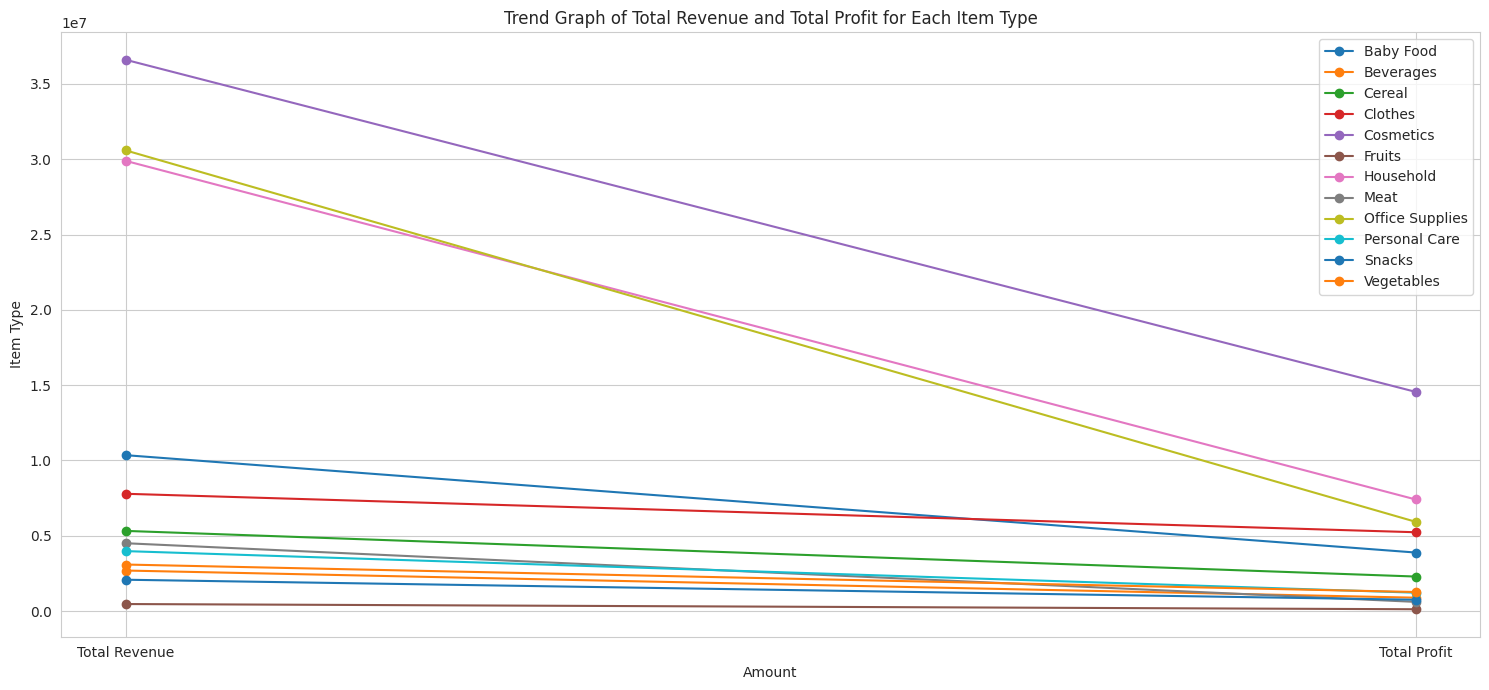

In [42]:
# Group the DataFrame by 'Item Type' and calculate total revenue and total profit
grouped_df = df_profit_margin.groupby('Item Type').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'})

# Plot separate line graph for each item type
plt.figure(figsize=(15,7))
for item_type, data in grouped_df.iterrows():
    plt.plot(['Total Revenue', 'Total Profit'], [data['Total Revenue'], data['Total Profit']], marker='o', label=item_type)

plt.xlabel('Amount')
plt.ylabel('Item Type')
plt.title('Trend Graph of Total Revenue and Total Profit for Each Item Type')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [43]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery time
Order Date,,,,,,,,,,,,,
2010-05-28,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days
2012-08-22,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days
2014-05-02,Europe,Russia,Office Supplies,Offline,L,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,6 days
2014-06-20,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,15 days
2013-02-01,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-07-26,Sub-Saharan Africa,Mali,Clothes,Online,M,512878119,888,109.28,35.84,97040.64,31825.92,65214.72,39 days
2011-11-11,Asia,Malaysia,Fruits,Offline,L,810711038,6267,9.33,6.92,58471.11,43367.64,15103.47,47 days
2016-06-01,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,728815257,1485,154.06,90.93,228779.10,135031.05,93748.05,28 days


#Will se what mode takes much time to deliver the order

In [46]:
df_group_delivery_time=df.groupby(['Item Type','Country'])['Delivery time'].mean().reset_index()

In [54]:
pivot_table = pd.pivot_table(df_group_delivery_time, values='Delivery time', index='Item Type', columns='Country', aggfunc='mean')

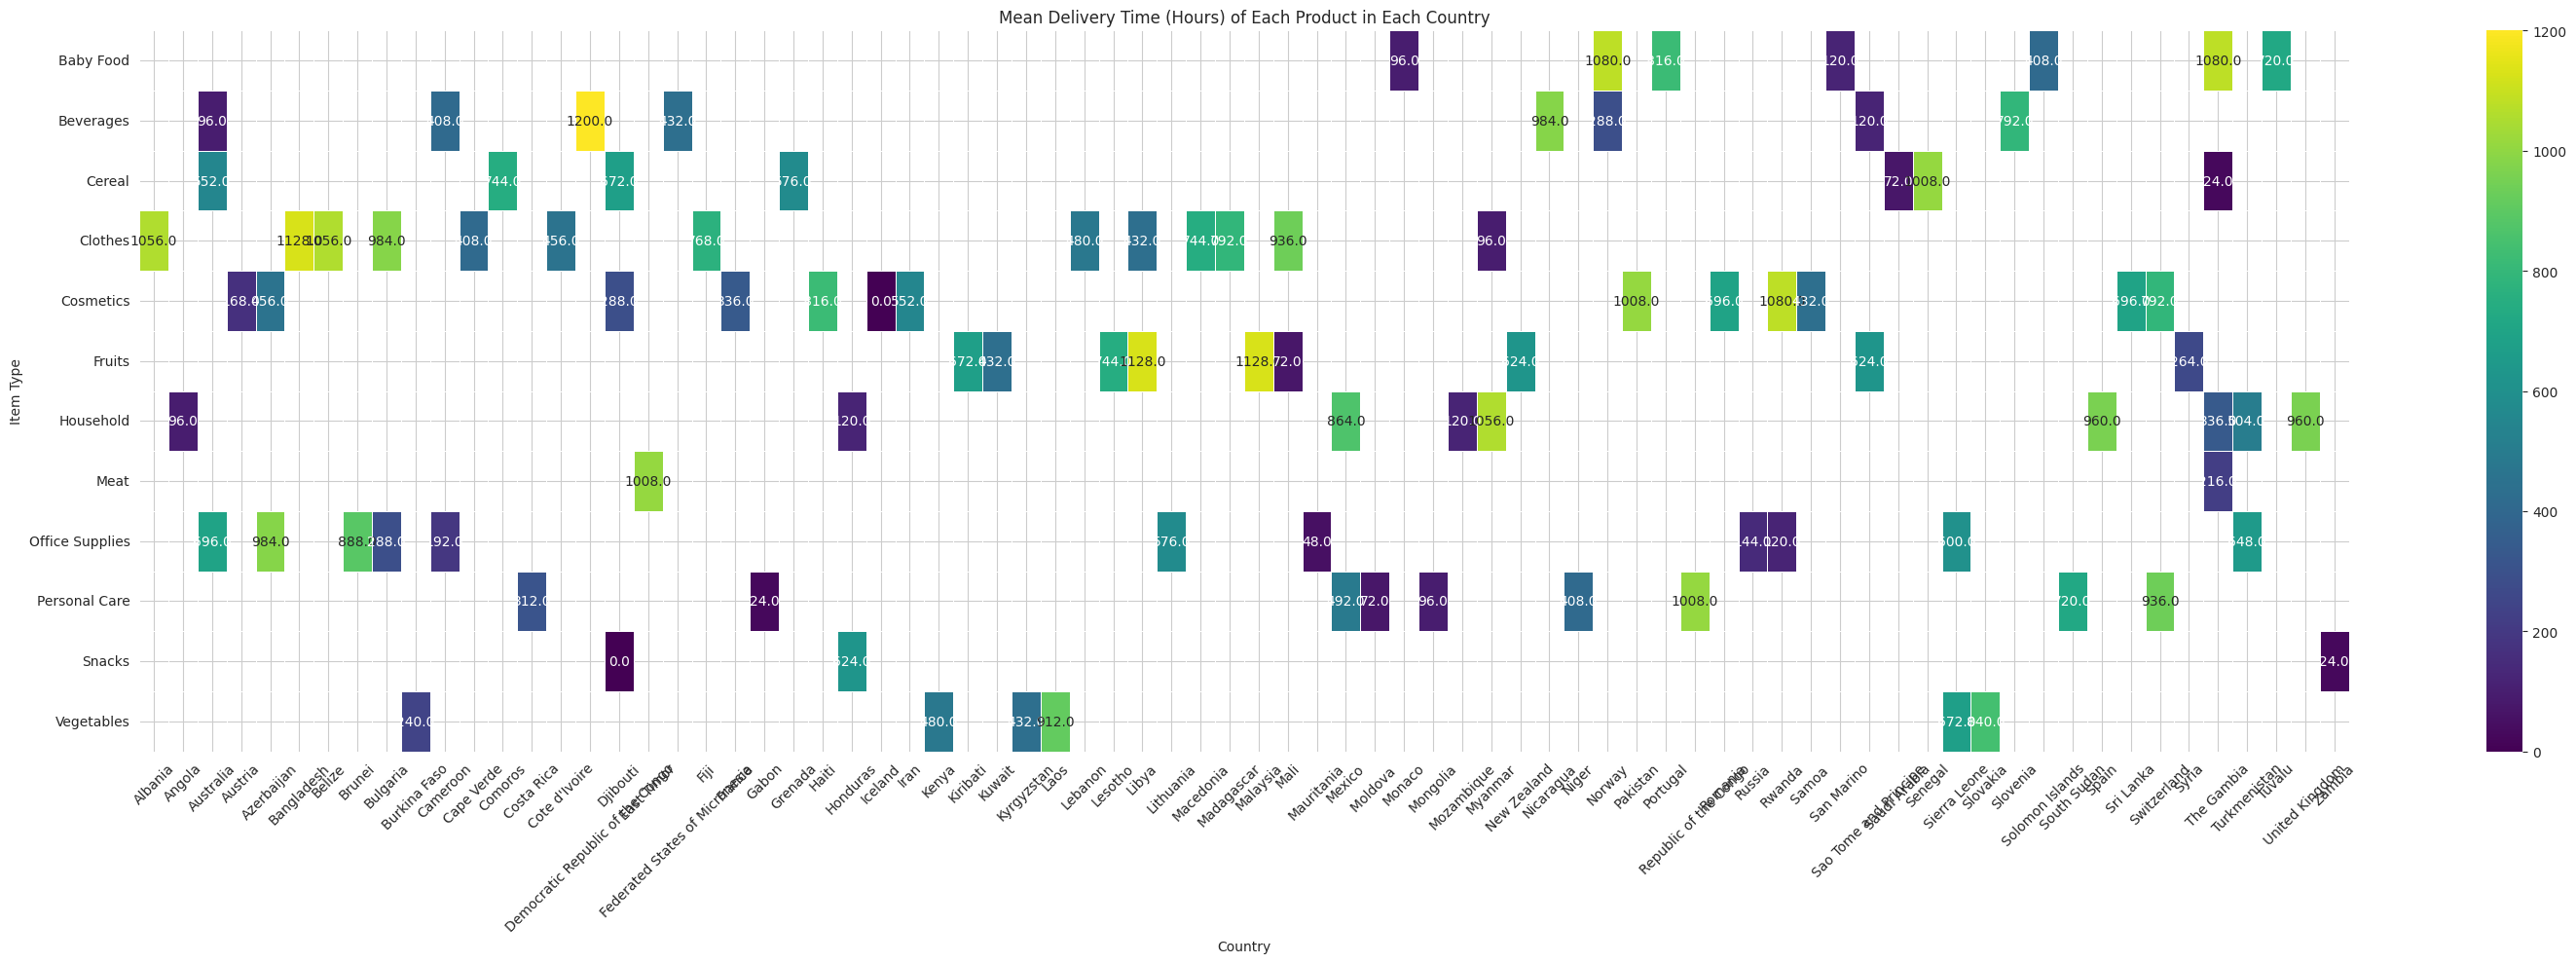

In [58]:
# Assuming df_group_delivery_time is your DataFrame
# Create a pivot table to calculate the mean delivery time for each product in each country
# Convert timedelta64[ns] to hours
pivot_table_hours = pivot_table / pd.Timedelta(hours=1)

# Plot a heatmap
plt.figure(figsize=(30,10))
sns.heatmap(pivot_table_hours, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Mean Delivery Time (Hours) of Each Product in Each Country')
plt.xlabel('Country')
plt.ylabel('Item Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery time
Order Date,,,,,,,,,,,,,
2010-05-28,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days
2012-08-22,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days
2014-05-02,Europe,Russia,Office Supplies,Offline,L,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,6 days
2014-06-20,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,15 days
2013-02-01,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-07-26,Sub-Saharan Africa,Mali,Clothes,Online,M,512878119,888,109.28,35.84,97040.64,31825.92,65214.72,39 days
2011-11-11,Asia,Malaysia,Fruits,Offline,L,810711038,6267,9.33,6.92,58471.11,43367.64,15103.47,47 days
2016-06-01,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,728815257,1485,154.06,90.93,228779.10,135031.05,93748.05,28 days
